Importing Libraries

In [ ]:
import nltk
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tag import pos_tag
from nltk import FreqDist
from nltk.util import bigrams
from wordcloud import WordCloud


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Importing the text File

In [ ]:
file = open(r"A_Man_called_owe.txt",encoding='utf-8')
wordslist = file.read().splitlines() # to escape \n occurence
wordslist = [i for i in wordslist if i!='']
text = ""
text = text.join(wordslist)

In [ ]:
text[:1000]

'                                         1         A MAN CALLED OVE BUYS A      COMPUTER THAT IS NOT A COMPUTEROve is fifty-nine.   He drives a Saab. He’s the kind of man who points at people he doesn’tlike the look of, as if they were burglars and his forefinger a policeman’sflashlight. He stands at the counter of a shop where owners of Japanese carscome to purchase white cables. Ove eyes the sales assistant for a long timebefore shaking a medium-sized white box at him.   “So this is one of those O-Pads, is it?” he demands.   The assistant, a young man with a single-digit body mass index, looks illat ease. He visibly struggles to control his urge to snatch the box out of Ove’shands.   “Yes, exactly. An iPad. Do you think you could stop shaking it likethat . . . ?”   Ove gives the box a skeptical glance, as if it’s a highly dubious sort ofbox, a box that rides a scooter and wears tracksuit pants and just called Ove“my friend” before offering to sell him a watch.   “I see. So it’s a co

Removing punctuations

In [ ]:
#Creating a string which has all the punctuations to be removed
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
plaintext = ""
for char in text:
    if char not in punctuations:
        plaintext = plaintext + char

#Converting the text into lower case
plaintext = plaintext.lower()

Tokenisation and remove Stop words

In [ ]:
# Step 2: Tokenize and Remove Stop Words
tokens = word_tokenize(plaintext)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
filtered_tokens[:30]

['1',
 'man',
 'called',
 'ove',
 'buys',
 'computer',
 'computerove',
 'fiftynine',
 'drives',
 'saab',
 'hes',
 'kind',
 'man',
 'points',
 'people',
 'doesntlike',
 'look',
 'burglars',
 'forefinger',
 'policemansflashlight',
 'stands',
 'counter',
 'shop',
 'owners',
 'japanese',
 'carscome',
 'purchase',
 'white',
 'cables',
 'ove']

Frequency and word cloud with  stop words

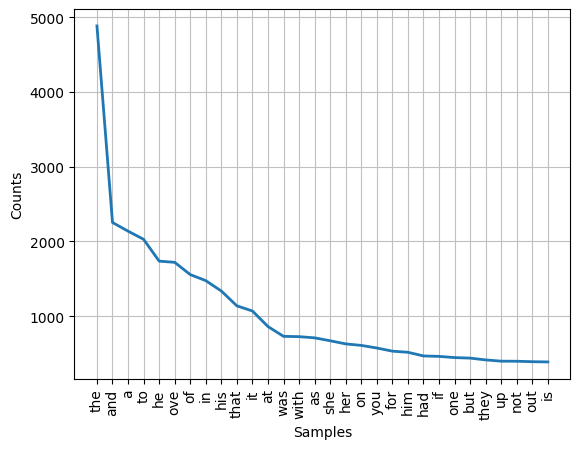

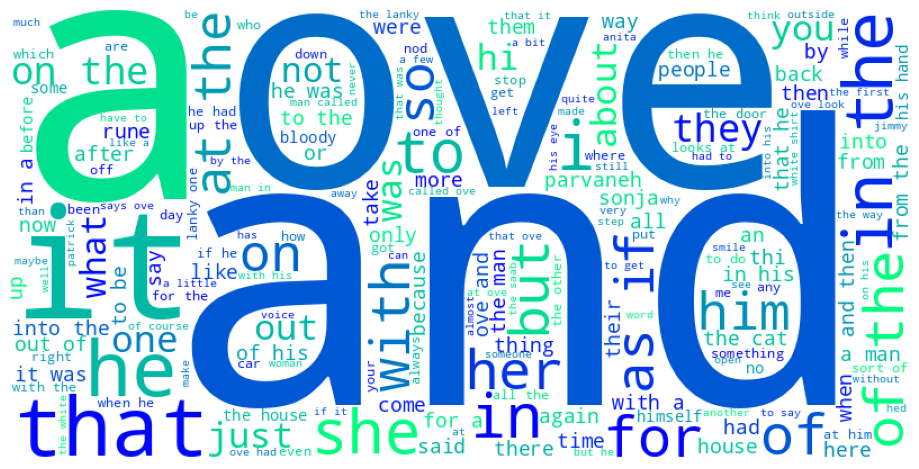

In [ ]:
fdist = FreqDist(tokens)
fdist.plot(30, cumulative=False)

# Word cloud with removing stopwords
wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                min_font_size = 2,stopwords = {},colormap='winter').generate(" ".join(tokens
                                                                                      ))

plt.figure(figsize = (9,6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Frequency Distribution of token without stop words

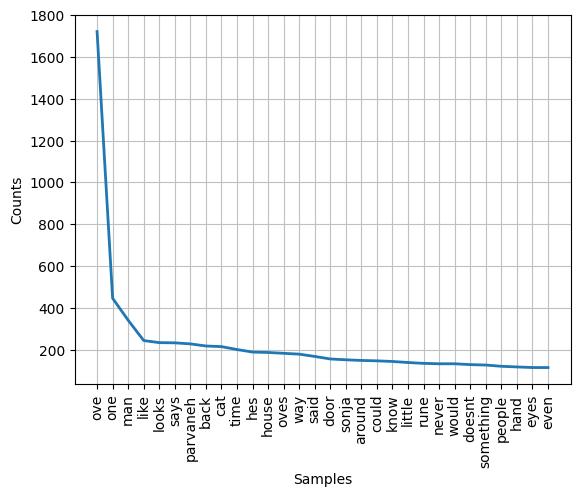

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist = FreqDist(filtered_tokens)
fdist.plot(30, cumulative=False)

Creating word cloud after removing stop words

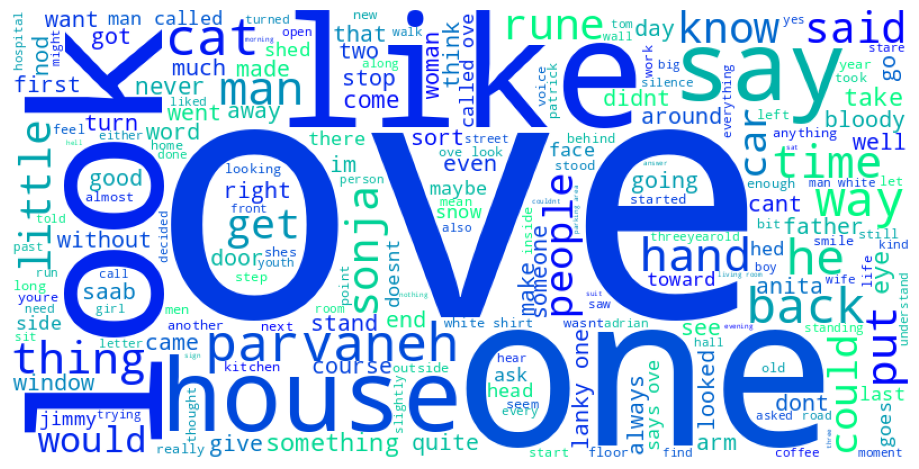

In [ ]:
# Word cloud with removing stopwords
wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                min_font_size = 2,stopwords = {},colormap='winter').generate(" ".join(filtered_tokens
                                                                                      ))

plt.figure(figsize = (9,6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Pos Tagging

In [ ]:
#  PoS Tagging
pos_tags = pos_tag(filtered_tokens)
pos_tags[:30]

[('1', 'CD'),
 ('man', 'NN'),
 ('called', 'VBN'),
 ('ove', 'RB'),
 ('buys', 'VBZ'),
 ('computer', 'NN'),
 ('computerove', 'NN'),
 ('fiftynine', 'NN'),
 ('drives', 'VBZ'),
 ('saab', 'JJ'),
 ('hes', 'NNS'),
 ('kind', 'NN'),
 ('man', 'NN'),
 ('points', 'NNS'),
 ('people', 'NNS'),
 ('doesntlike', 'VBP'),
 ('look', 'VBP'),
 ('burglars', 'NNS'),
 ('forefinger', 'RB'),
 ('policemansflashlight', 'VBD'),
 ('stands', 'NNS'),
 ('counter', 'RBR'),
 ('shop', 'NN'),
 ('owners', 'NNS'),
 ('japanese', 'JJ'),
 ('carscome', 'JJ'),
 ('purchase', 'NN'),
 ('white', 'JJ'),
 ('cables', 'NNS'),
 ('ove', 'IN')]

In [ ]:
# frequency of each pos tag
from collections import Counter
count_of_tags = Counter( tag for word,  tag in pos_tags)
print(count_of_tags)

Counter({'NN': 13213, 'JJ': 7264, 'NNS': 5684, 'RB': 3744, 'VBD': 2919, 'VBP': 2584, 'VBG': 2193, 'IN': 1920, 'VBZ': 1882, 'VBN': 1357, 'VB': 1003, 'CD': 828, 'MD': 378, 'RP': 157, 'DT': 153, 'RBR': 121, 'JJS': 119, 'JJR': 119, 'PRP': 59, 'CC': 49, 'WP': 38, 'WDT': 22, 'FW': 22, 'NNP': 17, 'UH': 15, 'WP$': 11, 'WRB': 7, 'RBS': 3, 'PRP$': 2, 'NNPS': 2, 'TO': 2, '$': 2, 'EX': 1})


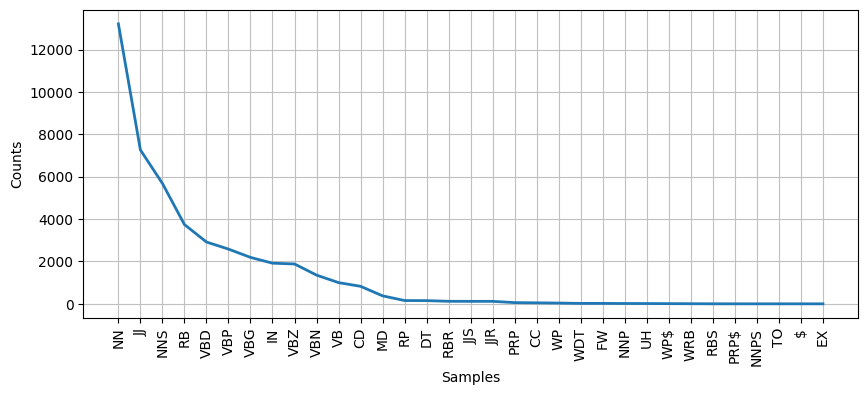

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Frequency Distribution Table of Pos Tags
freq_tags = nltk.FreqDist(count_of_tags)
plt.figure(figsize=(10,4))
freq_tags.plot(50, cumulative=False)

In [ ]:
# finding chapter C
start_index = tokens.index('1') + 1
end_index = tokens.index('2', start_index)
selected_words = tokens[start_index:end_index]
selected_words[:30]

['a',
 'man',
 'called',
 'ove',
 'buys',
 'a',
 'computer',
 'that',
 'is',
 'not',
 'a',
 'computerove',
 'is',
 'fiftynine',
 'he',
 'drives',
 'a',
 'saab',
 'hes',
 'the',
 'kind',
 'of',
 'man',
 'who',
 'points',
 'at',
 'people',
 'he',
 'doesntlike',
 'the']

Creating a bigram probability matrix

In [ ]:
chapter_c = selected_words


# Calculate bigrams and their frequencies
bi_grams = list(bigrams(chapter_c))
bigrams_frequency = nltk.FreqDist(bi_grams)
cfd = nltk.ConditionalFreqDist(bi_grams)

# Initialize unique words and the bigram matrix
unique_words = list(set(word for bigram in bigrams_frequency for word in bigram))
bigram_matrix = pd.DataFrame(0, columns=unique_words, index=unique_words, dtype=float)

# Calculate word frequencies
word_freq = nltk.FreqDist(chapter_c)
bigram_probabilities = {}


# Calculate bigram probabilities and populate the bigram matrix
for word1 in unique_words:
    for word2 in unique_words:
        conditional_freq = cfd[word1][word2]
        first_word_count = word_freq[word1]
        if  conditional_freq > 0:
            probability = float(conditional_freq) / first_word_count
            bigram_matrix.at[word1, word2] = probability

bigram_matrix.fillna(0.0, inplace=True)

bigram_matrix


,skeptical,after,two,short,initially,depends,laptop,wildly,haveforgotten,macbook,...,havea,that,me,clearshis,policemansflashlight,think,forefinger,hesuddenly,control,box
skeptical,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
after,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
short,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
initially,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
think,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
forefinger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hesuddenly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

print(bigram_matrix)

            skeptical  after  two  short  initially  depends  laptop  wildly  \
skeptical         0.0    0.0  0.0    0.0        0.0      0.0     0.0     0.0   
after             0.0    0.0  0.0    0.0        0.0      0.0     0.0     0.0   
two               0.0    0.0  0.0    0.0        0.0      0.0     0.0     0.0   
short             0.0    0.0  0.0    0.0        0.0      0.0     0.0     0.0   
initially         0.0    0.0  0.0    0.0        0.0      0.0     0.0     0.0   
...               ...    ...  ...    ...        ...      ...     ...     ...   
think             0.0    0.0  0.0    0.0        0.0      0.0     0.0     0.0   
forefinger        0.0    0.0  0.0    0.0        0.0      0.0     0.0     0.0   
hesuddenly        0.0    0.0  0.0    0.0        0.0      0.0     0.0     0.0   
control           0.0    0.0  0.0    0.0        0.0      0.0     0.0     0.0   
box               0.0    0.0  0.0    0.0        0.0      0.0     0.0     0.0   

            haveforgotten  macbook  ...

In [ ]:
# Function to create a bi-gram probability table
def create_bigram_probability_table(tokens):
    bigrams = list(nltk.bigrams(tokens))
    bigram_freq = nltk.FreqDist(bigrams)
    bigram_prob = []

    for bigram, freq in bigram_freq.items():
        word1, word2 = bigram
        probability = freq / len(bigrams)
        bigram_prob.append((word1, word2, probability))

    return bigram_prob

In [ ]:
# Creating a bigram probability table for the  chapter c
bigram_probability = create_bigram_probability_table(chapter_c)
top_ten_bigrams = sorted(bigram_probability, key=lambda x: x[2], reverse=True)[:15]

print("Top Ten Bigrams with Maximum Probability:")
for bigram in top_ten_bigrams:
    word1, word2, probability = bigram
    print(f"{word1} -> {word2}: Probability = {probability:.4f}")

Top Ten Bigrams with Maximum Probability:
as -> if: Probability = 0.0093
the -> counter: Probability = 0.0093
the -> assistant: Probability = 0.0082
a -> computer: Probability = 0.0070
sales -> assistant: Probability = 0.0070
for -> a: Probability = 0.0070
at -> the: Probability = 0.0058
the -> sales: Probability = 0.0058
the -> box: Probability = 0.0058
is -> it: Probability = 0.0047
want -> a: Probability = 0.0047
a -> laptop: Probability = 0.0047
at -> him: Probability = 0.0035
with -> a: Probability = 0.0035
think -> you: Probability = 0.0035


Shannons Game


In [ ]:
def make_guess(previous_word, bigram_probabilities):
    later_probabilities = [(word, prob) for (prev, word, prob) in bigram_probabilities if prev == previous_word]
    optimal_guesses = sorted(later_probabilities, key=lambda x: x[1], reverse=True)
    return [word for word, _ in optimal_guesses]

In [ ]:
def play_shannons_game(existing_string, bigram_probabilities):
    s = ""
    print("Welcome to Shannon's Game!")
    print("Think of a word, and I will try to guess it based on the provided string.")
    print("Please respond with 'yes' or 'no' to my guesses.")
    print("You can end the game by typing 'exit'.")
    previous_word = input("Think of a starting word: ")
    print(f"Starting word: {previous_word}")
    s = " " + previous_word
    while True:
        guesses = make_guess(previous_word, bigram_probabilities)
        for guess in guesses:
            response = input(f"Is it '{guess}'? (yes/no): ")
            if response == 'yes':
                previous_word = guess
                s = s + " " + guess
                print(f"Sentence: {s}")
                break
            elif response == 'no':
                continue
            elif response == 'exit':
                print("Thanks for playing!")
                return
            else:
                print("No more guesses. Thanks for playing!")
                return

In [ ]:
play_shannons_game(chapter_c, bigram_probability)

Welcome to Shannon's Game!
Think of a word, and I will try to guess it based on the provided string.
Please respond with 'yes' or 'no' to my guesses.
You can end the game by typing 'exit'.
Think of a starting word: the
Starting word: the
Is it 'counter'? (yes/no): no
Is it 'assistant'? (yes/no): yes
Sentence:  the assistant
Is it 'nods'? (yes/no): yes
Sentence:  the assistant nods
Is it 'then'? (yes/no): no
Is it 'confusedly'? (yes/no): yes
Sentence:  the assistant nods confusedly
Is it 'yes'? (yes/no): exit
Thanks for playing!


In [ ]:

# finding chapter other than C
start_index = tokens.index('2') + 1
end_index = tokens.index('3', start_index)
chapter_other_than_c = tokens[start_index:end_index]


In [ ]:
bigram_probability = create_bigram_probability_table(chapter_other_than_c)
play_shannons_game(chapter_other_than_c, bigram_probability)

Welcome to Shannon's Game!
Think of a word, and I will try to guess it based on the provided string.
Please respond with 'yes' or 'no' to my guesses.
You can end the game by typing 'exit'.
Think of a starting word: ove
Starting word: ove
Is it 'had'? (yes/no): no
Is it 'has'? (yes/no): no
Is it 'and'? (yes/no): no
Is it 'was'? (yes/no): no
Is it 'makes'? (yes/no): no
Is it 'exceedingly'? (yes/no): no
Is it 'on'? (yes/no): no
Is it 'stomped'? (yes/no): yes
Sentence:  ove stomped
Is it 'forward'? (yes/no): yes
Sentence:  ove stomped forward
Is it 'the'? (yes/no): exit
Thanks for playing!
